In [1]:
%matplotlib inline
import librosa
import librosa.display
import matplotlib.pyplot as plt
import mdct
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
lofi_path = r'D:\sagniD\audio_data\lofi\lofi0.mp3'
y_lofi, sr = librosa.load(lofi_path, sr=8000, mono=False)

In [3]:
y_lofi.shape

(2, 57601835)

### Performing MDCT

In [4]:
FRAME_LENGTH = 256
transformed_lofi = mdct.mdct(y_lofi.T, framelength=FRAME_LENGTH)

In [5]:
transformed_lofi.shape

(128, 450017, 2)

In [6]:
reconstructed_lofi = mdct.imdct(transformed_lofi, framelength=FRAME_LENGTH)

C:\Users\sagni\Anaconda3\envs\chacks\lib\site-packages\stft\utils.py:53: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return data[slicetuple]
C:\Users\sagni\Anaconda3\envs\chacks\lib\site-packages\stft\utils.py:25: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return data[slicetuple]


In [7]:
reconstructed_lofi.shape

(57601835, 2)

In [9]:
good_reconstruction = np.allclose(y_lofi.T, reconstructed_lofi)
print(f'It is {good_reconstruction} that `mdct` module reliably performs the MDCT and IMDCT.')

It is True that `mdct` module reliably performs the MDCT and IMDCT.


### Visualizing MDCT Output
Great! So now let's look at the MDCT results visually.

In [10]:
transformed_lofi = transformed_lofi.astype(np.float32)

We need to sqare the MDCT output in order to get the spectrum, then we visualize it by taking the natural logarithm of it.

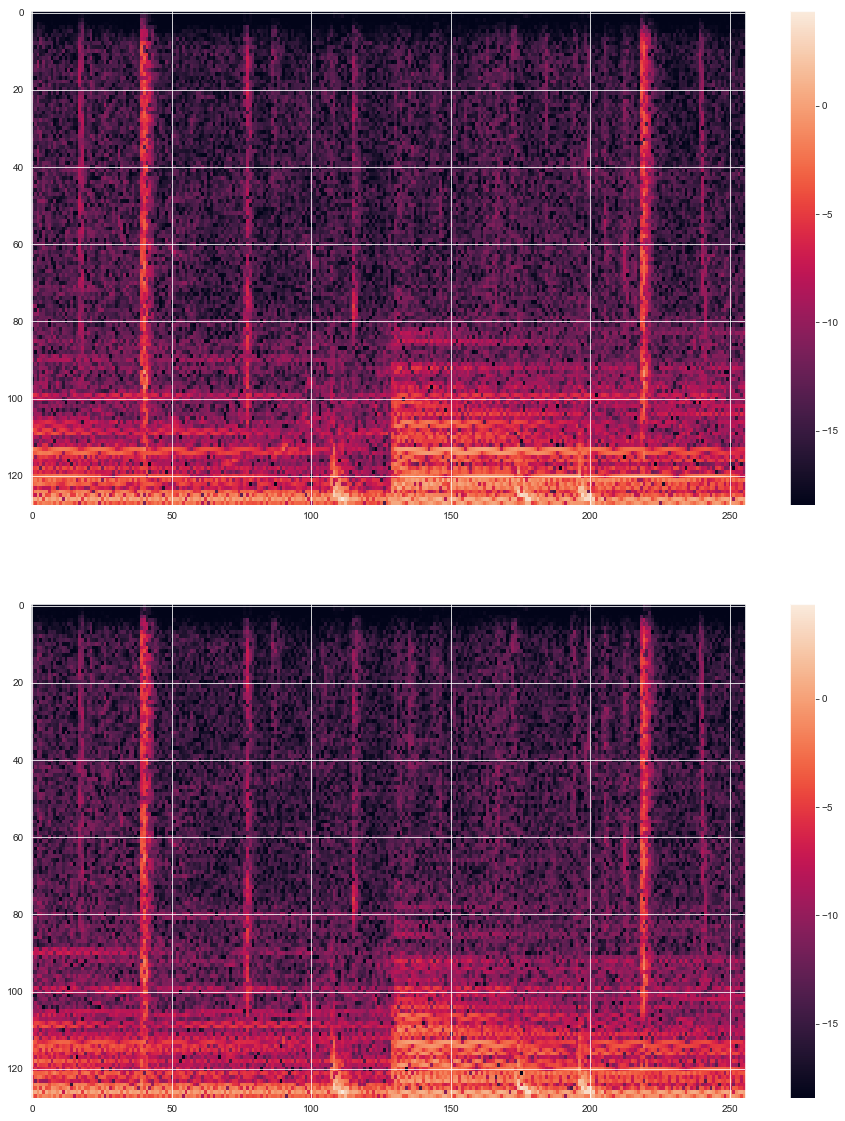

In [19]:
eps = 1e-8
fig, axs = plt.subplots(2, 1, figsize=(16, 20))
left = axs[0].imshow(np.log(np.power(transformed_lofi[::-1, 2560:2816, 0], 2) + eps), label='Left channel', aspect='auto')
right = axs[1].imshow(np.log(np.power(transformed_lofi[::-1, 2560:2816, 1], 2) + eps), label='Right channel', aspect='auto')
fig.colorbar(left, ax=axs[0])
fig.colorbar(right, ax = axs[1])

In [20]:
recons = mdct.imdct(transformed_lofi, framelength=FRAME_LENGTH)

In [21]:
recons.shape, recons.dtype, transformed_lofi.dtype

((57601835, 2), dtype('float64'), dtype('float32'))

In [23]:
np.allclose(recons.astype(np.float32), y_lofi.astype(np.float32).T, atol=1e-6)

True

Reassurance :)

### Saving the output

In [24]:
np.save('audio_training/mdct_lofi_stereo.npy', transformed_lofi)

### Sanity Check
Now let's load the saved numpy array and see if everything is the same.

In [25]:
loaded_lofi = np.load('audio_training/mdct_lofi_stereo.npy')

In [26]:
loaded_lofi.shape, loaded_lofi.dtype

((128, 450017, 2), dtype('float32'))

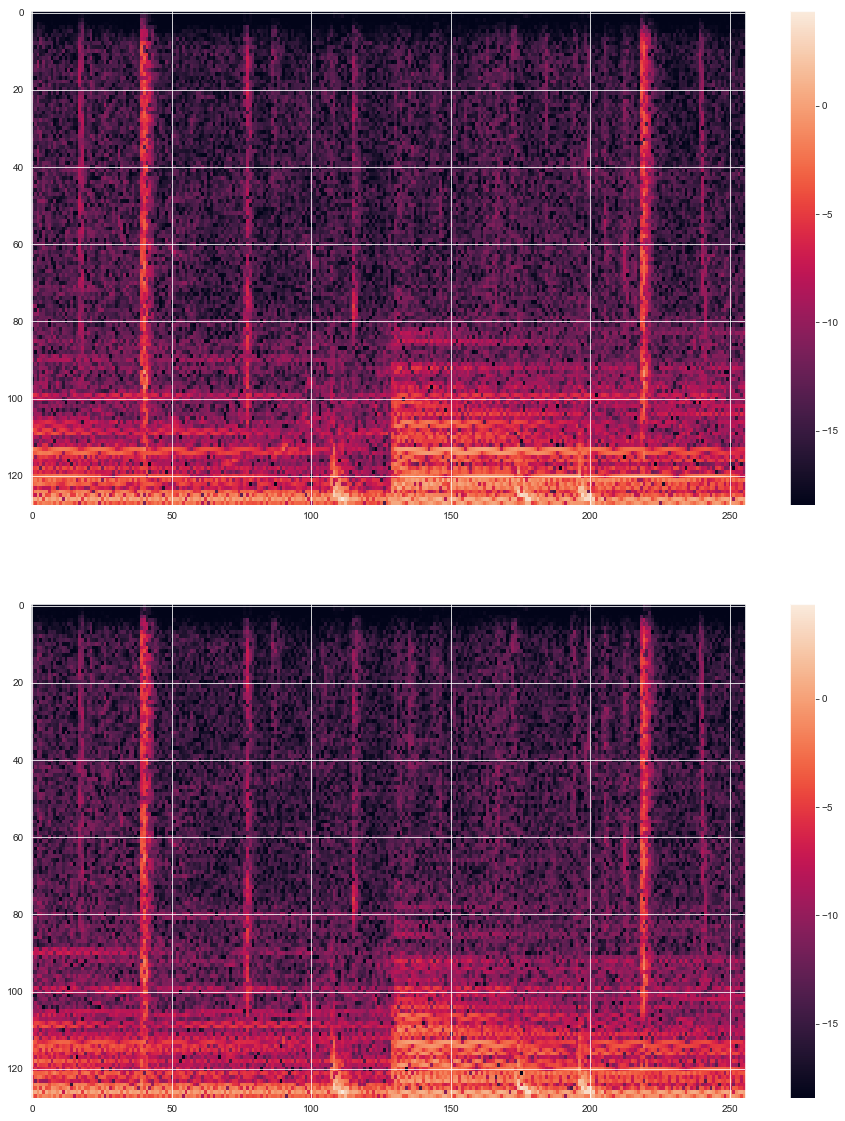

In [27]:
eps = 1e-8
fig, axs = plt.subplots(2, 1, figsize=(16, 20))
left = axs[0].imshow(np.log(np.power(loaded_lofi[::-1, 2560:2816, 0], 2) + eps), label='Left channel', aspect='auto')
right = axs[1].imshow(np.log(np.power(loaded_lofi[::-1, 2560:2816, 1], 2) + eps), label='Right channel', aspect='auto')
fig.colorbar(left, ax=axs[0])
fig.colorbar(right, ax = axs[1])

In [28]:
loaded_recons = mdct.imdct(loaded_lofi, framelength=FRAME_LENGTH).astype(np.float32)

In [30]:
loaded_recons.shape

(57602048, 2)

In [31]:
np.allclose(loaded_recons[:y_lofi.shape[1]], y_lofi.astype(np.float32).T, atol=1e-6)

True

Everything checks out! So this means we _**finally**_ get to train the model for real!!!